### Install and import

In [1]:
%pip install statsmodels

import pandas as pd
import numpy as np

import matplotlib as mlp
import matplotlib.pyplot as plt


from scipy.stats.mstats import spearmanr
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.stats.multicomp as mc
from statsmodels.formula.api import ols

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Load the file (`babblingstats.tsv`) into a `pandas DataFrame`

In [2]:
_FIN = "~/Documents/PhD/Thesis/Catenae/data/babblingstats.tsv"
df = pd.read_csv(_FIN, sep='\t', header=0)

### Convert columns to `float`

In [3]:
cols = df.columns
#cols.remove('catena')
for col in cols[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [4]:
df

,catena,input_freq_01,input_freq_02,input_freq_03,input_freq_04,input_freq_05,input_freq_06,input_freq_07,input_freq_08,input_freq_09,...,babbling_rank_01,babbling_rank_02,babbling_rank_03,babbling_rank_04,babbling_rank_05,babbling_rank_06,babbling_rank_07,babbling_rank_08,babbling_rank_09,babbling_rank_10
0,@nsubj|_AUX|@root,38247.0,38223.0,38508.0,38499.0,38170.0,37492.0,38379.0,38505.0,38565.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,@nsubj|@root,65882.0,65850.0,66203.0,65810.0,65611.0,64831.0,65765.0,66129.0,65778.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,@nsubj|_VERB,62323.0,62703.0,62636.0,62457.0,62406.0,61926.0,62251.0,62689.0,61607.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,_PRON|_AUX|@root,35662.0,35671.0,36003.0,35822.0,35674.0,35178.0,35834.0,36004.0,35775.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,_DET|_NOUN,47456.0,47426.0,47929.0,47688.0,47937.0,47326.0,47867.0,48034.0,47561.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11073,_VERB|@advmod|_VERB|@obl,770.0,846.0,841.0,832.0,829.0,887.0,827.0,844.0,783.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914.0
11074,_AUX|_PART|_VERB|me,443.0,474.0,415.0,431.0,466.0,476.0,432.0,445.0,465.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9979.0
11075,for|_NOUN|@case|@nmod,226.0,243.0,231.0,222.0,222.0,241.0,225.0,218.0,229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9982.0
11076,@root|_NOUN|@amod|@nmod,484.0,509.0,511.0,541.0,553.0,512.0,544.0,492.0,527.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9990.0


### Have all speakers been exposed to all possible constructions?

We restrict to the set of contructions that all speakers have seen in the input

In [5]:
interesting_cols = [f'input_freq_'+str(i).zfill(2) for i in range(1, 11)]

df = df[~df[interesting_cols].isna().any(axis=1)]

In [6]:
df

,catena,input_freq_01,input_freq_02,input_freq_03,input_freq_04,input_freq_05,input_freq_06,input_freq_07,input_freq_08,input_freq_09,...,babbling_rank_01,babbling_rank_02,babbling_rank_03,babbling_rank_04,babbling_rank_05,babbling_rank_06,babbling_rank_07,babbling_rank_08,babbling_rank_09,babbling_rank_10
0,@nsubj|_AUX|@root,38247.0,38223.0,38508.0,38499.0,38170.0,37492.0,38379.0,38505.0,38565.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,@nsubj|@root,65882.0,65850.0,66203.0,65810.0,65611.0,64831.0,65765.0,66129.0,65778.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,@nsubj|_VERB,62323.0,62703.0,62636.0,62457.0,62406.0,61926.0,62251.0,62689.0,61607.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,_PRON|_AUX|@root,35662.0,35671.0,36003.0,35822.0,35674.0,35178.0,35834.0,36004.0,35775.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,_DET|_NOUN,47456.0,47426.0,47929.0,47688.0,47937.0,47326.0,47867.0,48034.0,47561.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11073,_VERB|@advmod|_VERB|@obl,770.0,846.0,841.0,832.0,829.0,887.0,827.0,844.0,783.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914.0
11074,_AUX|_PART|_VERB|me,443.0,474.0,415.0,431.0,466.0,476.0,432.0,445.0,465.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9979.0
11075,for|_NOUN|@case|@nmod,226.0,243.0,231.0,222.0,222.0,241.0,225.0,218.0,229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9982.0
11076,@root|_NOUN|@amod|@nmod,484.0,509.0,511.0,541.0,553.0,512.0,544.0,492.0,527.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9990.0


### Add column registering how many speakers share a given Cxn

In [7]:
def compute_speakers(df_row):
    
    speakers = [df_row["babbling_mi_"+str(i).zfill(2)] for i in range(1,11)]
    speakers = [x for x in speakers if not pd.isna(x)]
    
    return len(speakers)

df['speakers'] = df.apply(compute_speakers, axis=1)

/tmp/ipykernel_14579/3518122165.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['speakers'] = df.apply(compute_speakers, axis=1)


### Add column to bin data based on number of speakers

We define:
* `core` - cxns shared by 9 or 10 speakers
* `periphery` - cxns shared by half of the speakers or less
* `other` - cxns with intermediate status (shared by 8, 7 or 6 speakers)

In [8]:
def compute_class(df_row):
    
    ret = "periphery"
    if df_row["speakers"] > 8:
        ret = "core"
    elif df_row["speakers"] > 5:
        ret = "other"    
    
    return ret

df['bin'] = df.apply(compute_class, axis=1)

/tmp/ipykernel_14579/373284013.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin'] = df.apply(compute_class, axis=1)


### Add column recording min frequency for each construction

In [9]:
def min_freq(row):
    m = min([row['input_freq_'+str(i).zfill(2)] for i in range(1, 11)])
    return m

df["input_freq_min"] = df.apply(min_freq, axis=1)

/tmp/ipykernel_14579/3950358101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["input_freq_min"] = df.apply(min_freq, axis=1)


In [10]:
df

,catena,input_freq_01,input_freq_02,input_freq_03,input_freq_04,input_freq_05,input_freq_06,input_freq_07,input_freq_08,input_freq_09,...,babbling_rank_04,babbling_rank_05,babbling_rank_06,babbling_rank_07,babbling_rank_08,babbling_rank_09,babbling_rank_10,speakers,bin,input_freq_min
0,@nsubj|_AUX|@root,38247.0,38223.0,38508.0,38499.0,38170.0,37492.0,38379.0,38505.0,38565.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10,core,37492.0
1,@nsubj|@root,65882.0,65850.0,66203.0,65810.0,65611.0,64831.0,65765.0,66129.0,65778.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10,core,64831.0
2,@nsubj|_VERB,62323.0,62703.0,62636.0,62457.0,62406.0,61926.0,62251.0,62689.0,61607.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,10,core,61607.0
3,_PRON|_AUX|@root,35662.0,35671.0,36003.0,35822.0,35674.0,35178.0,35834.0,36004.0,35775.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,10,core,35178.0
4,_DET|_NOUN,47456.0,47426.0,47929.0,47688.0,47937.0,47326.0,47867.0,48034.0,47561.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,10,core,47326.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11073,_VERB|@advmod|_VERB|@obl,770.0,846.0,841.0,832.0,829.0,887.0,827.0,844.0,783.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9914.0,1,periphery,770.0
11074,_AUX|_PART|_VERB|me,443.0,474.0,415.0,431.0,466.0,476.0,432.0,445.0,465.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9979.0,1,periphery,415.0
11075,for|_NOUN|@case|@nmod,226.0,243.0,231.0,222.0,222.0,241.0,225.0,218.0,229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9982.0,1,periphery,218.0
11076,@root|_NOUN|@amod|@nmod,484.0,509.0,511.0,541.0,553.0,512.0,544.0,492.0,527.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9990.0,1,periphery,484.0


### Is input frequency related to rank?

For each speaker, we check whether the rank of a certain construction (sorted by decreasing MI) correlates with the frequency in which that construction appears in the input

In [11]:
print("speaker\tstat\tp value")

for i in range(1, 11):
    i = str(i).zfill(2)
    
    input_column = df[f'input_freq_{i}'][df[f'babbling_rank_{i}'].notna()]
    babbling_column = df[ f'babbling_rank_{i}'][df[f'babbling_rank_{i}'].notna()]
    
    s, p_s = spearmanr(input_column, babbling_column)

    
    print(f'{i}\t{s:.4f}\t{p_s:.3f}')

speaker	stat	p value
01	-0.7483	0.000
02	-0.7552	0.000
03	-0.7467	0.000
04	-0.7477	0.000
05	-0.7499	0.000
06	-0.7502	0.000
07	-0.7485	0.000
08	-0.7480	0.000
09	-0.7449	0.000
10	-0.7514	0.000


### Are core constructions also the most frequent ones?

We check whether there's a significant difference in the input frequencies (in log scale) among the three groups of constructions (core, peripherial and other cxns)

In [12]:
# Compute log of frequencies

log_df = df.copy()

for i in range(1, 11):
    i = str(i).zfill(2)
    log_df[f'input_freq_{i}'] =  np.log2(log_df[f'input_freq_{i}'])
    
log_df["input_freq_min"] = np.log2(log_df[f'input_freq_min'])

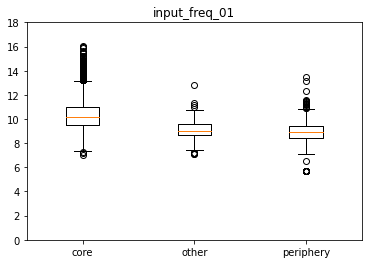

                sum_sq       df            F  PR(>F)
C(bin)     2721.008579      2.0  1074.257529     0.0
Residual  13991.851101  11048.0          NaN     NaN

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj  lower   upper  reject
------------------------------------------------------
  core     other  -1.2404  -0.0 -1.3617 -1.1191   True
  core periphery  -1.4445  -0.0 -1.5264 -1.3626   True
 other periphery  -0.2041 0.002 -0.3453 -0.0629   True
------------------------------------------------------



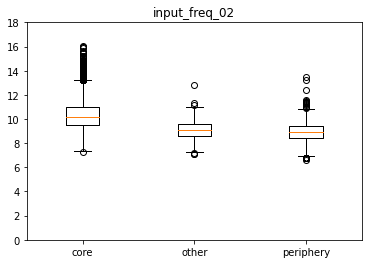

                sum_sq       df            F  PR(>F)
C(bin)     2683.056100      2.0  1069.191301     0.0
Residual  13862.067422  11048.0          NaN     NaN

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  core     other  -1.2549   -0.0 -1.3756 -1.1342   True
  core periphery   -1.426   -0.0 -1.5075 -1.3445   True
 other periphery  -0.1711 0.0121 -0.3116 -0.0305   True
-------------------------------------------------------



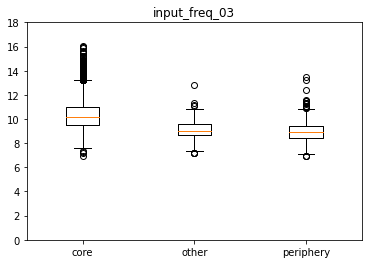

                sum_sq       df            F  PR(>F)
C(bin)     2596.399089      2.0  1053.714025     0.0
Residual  13611.386232  11048.0          NaN     NaN

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  core     other  -1.2489   -0.0 -1.3686 -1.1293   True
  core periphery  -1.3974   -0.0 -1.4782 -1.3166   True
 other periphery  -0.1485 0.0334 -0.2877 -0.0092   True
-------------------------------------------------------



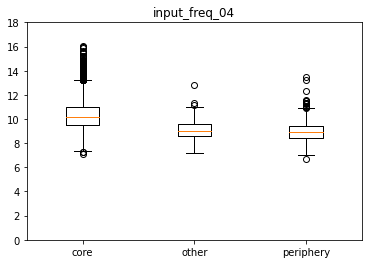

                sum_sq       df            F  PR(>F)
C(bin)     2632.931296      2.0  1058.620096     0.0
Residual  13738.934810  11048.0          NaN     NaN

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  core     other  -1.2549   -0.0 -1.3751 -1.1347   True
  core periphery  -1.4082   -0.0 -1.4894 -1.3271   True
 other periphery  -0.1533 0.0276 -0.2933 -0.0134   True
-------------------------------------------------------



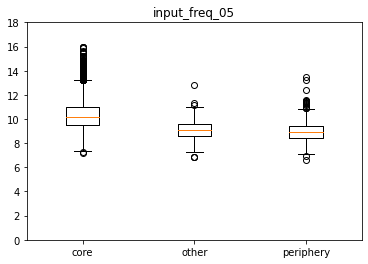

                sum_sq       df            F  PR(>F)
C(bin)     2665.927611      2.0  1064.685135     0.0
Residual  13831.867876  11048.0          NaN     NaN

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  core     other  -1.2626   -0.0 -1.3832  -1.142   True
  core periphery  -1.4171   -0.0 -1.4985 -1.3357   True
 other periphery  -0.1545 0.0268 -0.2948 -0.0141   True
-------------------------------------------------------



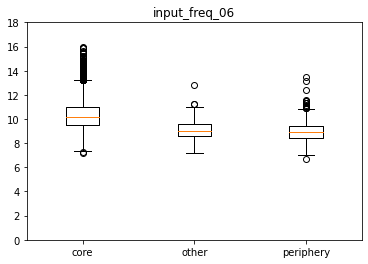

                sum_sq       df            F  PR(>F)
C(bin)     2626.631347      2.0  1053.462154     0.0
Residual  13773.168322  11048.0          NaN     NaN

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  core     other  -1.2609   -0.0 -1.3812 -1.1405   True
  core periphery  -1.4038   -0.0  -1.485 -1.3225   True
 other periphery  -0.1429 0.0443  -0.283 -0.0028   True
-------------------------------------------------------



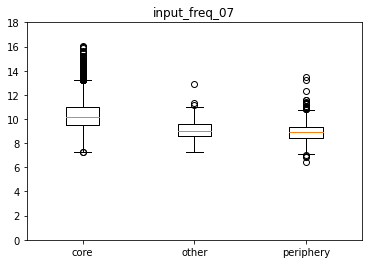

                sum_sq       df            F  PR(>F)
C(bin)     2575.467711      2.0  1029.150229     0.0
Residual  13823.913389  11048.0          NaN     NaN

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  core     other  -1.2505   -0.0 -1.3711   -1.13   True
  core periphery  -1.3893   -0.0 -1.4706 -1.3079   True
 other periphery  -0.1387 0.0535 -0.2791  0.0016  False
-------------------------------------------------------



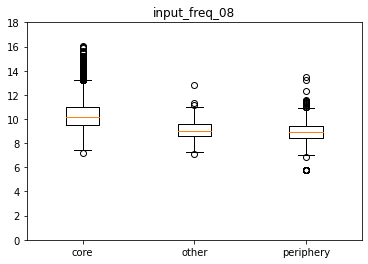

                sum_sq       df            F  PR(>F)
C(bin)     2760.141111      2.0  1092.847035     0.0
Residual  13951.650143  11048.0          NaN     NaN

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj  lower   upper  reject
------------------------------------------------------
  core     other  -1.2556  -0.0 -1.3767 -1.1345   True
  core periphery  -1.4526  -0.0 -1.5343 -1.3708   True
 other periphery   -0.197 0.003 -0.3379  -0.056   True
------------------------------------------------------



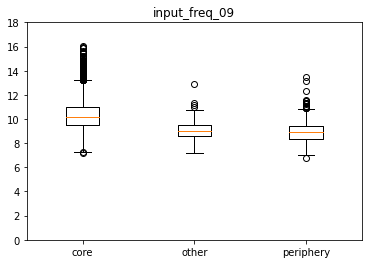

                sum_sq       df            F  PR(>F)
C(bin)     2661.177785      2.0  1057.807554     0.0
Residual  13896.994807  11048.0          NaN     NaN

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  core     other  -1.2535   -0.0 -1.3744 -1.1326   True
  core periphery  -1.4188   -0.0 -1.5004 -1.3372   True
 other periphery  -0.1653 0.0163  -0.306 -0.0246   True
-------------------------------------------------------



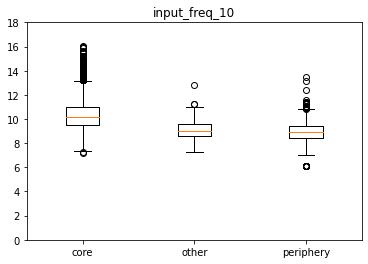

                sum_sq       df            F  PR(>F)
C(bin)     2699.068579      2.0  1066.705923     0.0
Residual  13977.287004  11048.0          NaN     NaN

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  core     other  -1.2451   -0.0 -1.3663 -1.1238   True
  core periphery  -1.4352   -0.0  -1.517 -1.3533   True
 other periphery  -0.1901 0.0045 -0.3312  -0.049   True
-------------------------------------------------------



In [13]:
for i in range(1, 11):
    i = str(i).zfill(2)

    core = log_df[f'input_freq_{i}'][log_df['bin'] == "core"]
    other = log_df[f'input_freq_{i}'][log_df['bin'] == "other"]
    periphery = log_df[f'input_freq_{i}'][log_df['bin'] == "periphery"]

    # plot boxes
    fig, ax = plt.subplots()
    ax.set_title(f'input_freq_{i}')
    ax.boxplot([core, other, periphery])
    ax.set_ylim(0, 18)
    ax.set_xticklabels(["core", "other", "periphery"])
    plt.show()
    
    # compute ANOVA
    model = ols(f'input_freq_{i} ~ C(bin)', data=log_df).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    print(aov_table)
    print()
    
    # compute Tukey's posthoc
    comp = mc.MultiComparison(log_df[f'input_freq_{i}'], log_df['bin'])
    post_hoc_res = comp.tukeyhsd()
    print(post_hoc_res.summary())
    print()


The distributions shown above seem to have a lot of outliers. How come peripheral constructions can have such high frequency and core constructions can have such low frequency? We want to check if it is the case that, for instance, the peripheral constructions, that are shared by 5 speakers, don't have particularly frequency for those 5 speakers.

To check that, we compute boxplots and anova also for the minimum registered input frequency.

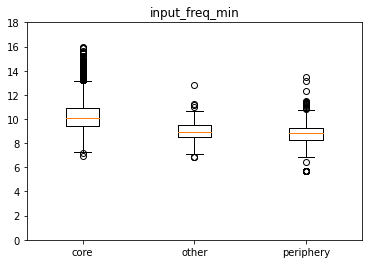

                sum_sq       df            F  PR(>F)
C(bin)     2897.075317      2.0  1101.435973     0.0
Residual  14529.618097  11048.0          NaN     NaN

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  core     other  -1.2887   -0.0 -1.4123 -1.1651   True
  core periphery  -1.4873   -0.0 -1.5707 -1.4039   True
 other periphery  -0.1986 0.0035 -0.3425 -0.0547   True
-------------------------------------------------------



In [14]:
core = log_df[f'input_freq_min'][log_df['bin'] == "core"]
other = log_df[f'input_freq_min'][log_df['bin'] == "other"]
periphery = log_df[f'input_freq_min'][log_df['bin'] == "periphery"]

    
fig, ax = plt.subplots()
ax.set_title(f'input_freq_min')
ax.boxplot([core, other, periphery])
ax.set_ylim(0, 18)
ax.set_xticklabels(["core", "other", "periphery"])
plt.show()

    
model = ols('input_freq_min ~ C(bin)', data=log_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)
print()
    
comp = mc.MultiComparison(log_df[f'input_freq_min'], log_df['bin'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())
print()

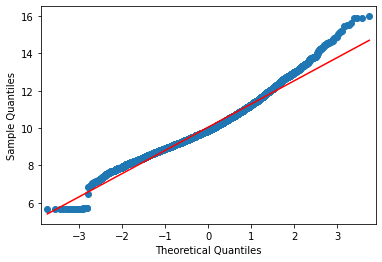

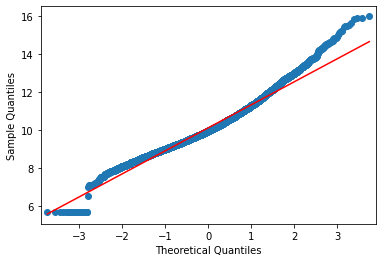

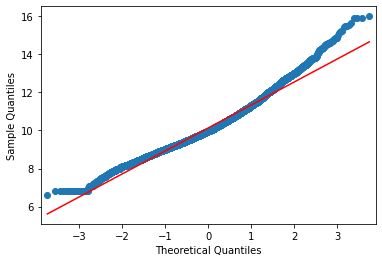

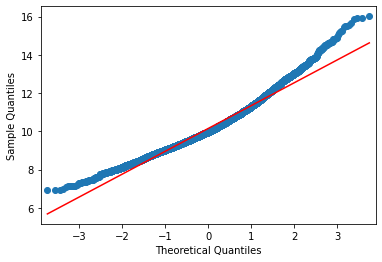

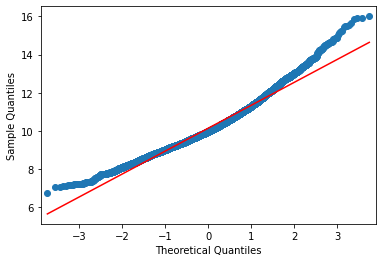

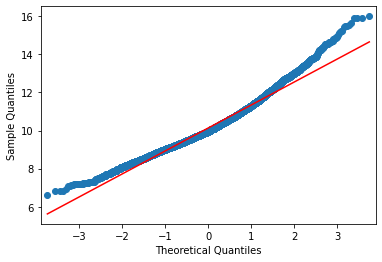

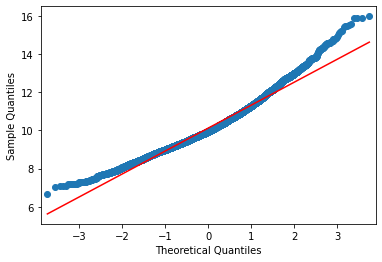

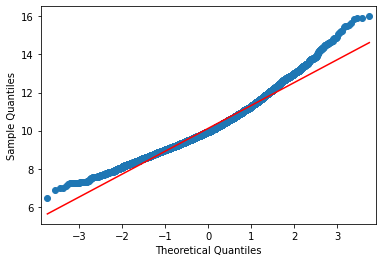

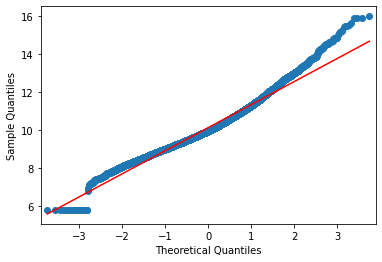

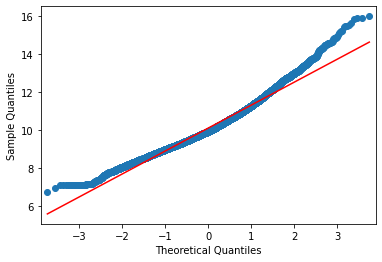

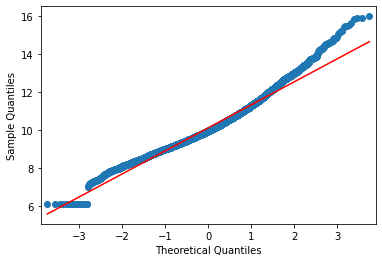

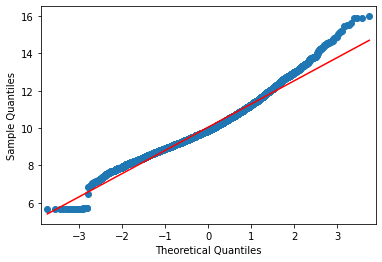

In [15]:
# Check that logs are normally distributed

for i in range(1, 11):
    i = str(i).zfill(2)
    
    sm.qqplot(log_df[f'input_freq_{i}'], line="r")
    
sm.qqplot(log_df[f'input_freq_min'], line="r")

### Pairwise input frequency and rank correlations

In [16]:
for i in range(1, 11):
    
    for j in range(i+1, 11):
    
        i = str(i).zfill(2)
        j = str(j).zfill(2)

        s_f, p_s_f = spearmanr(df[f'input_freq_{i}'], df[f'input_freq_{j}'], nan_policy='propagate')
        s_r, p_s_r = spearmanr(df[f'babbling_rank_{i}'], df[f'babbling_rank_{j}'], nan_policy='propagate')

        print(i, j, "\t", "{:.3f}".format(s_f), p_s_f, "\t",  "{:.3f}".format(s_r), p_s_r)
    print()

01 02 	 0.998 0.0 	 0.986 0.0
01 03 	 0.998 0.0 	 0.984 0.0
01 04 	 0.998 0.0 	 0.987 0.0
01 05 	 0.997 0.0 	 0.984 0.0
01 06 	 0.998 0.0 	 0.984 0.0
01 07 	 0.998 0.0 	 0.983 0.0
01 08 	 0.998 0.0 	 0.991 0.0
01 09 	 0.997 0.0 	 0.981 0.0
01 10 	 0.997 0.0 	 0.989 0.0

02 03 	 0.998 0.0 	 0.980 0.0
02 04 	 0.998 0.0 	 0.987 0.0
02 05 	 0.998 0.0 	 0.985 0.0
02 06 	 0.998 0.0 	 0.981 0.0
02 07 	 0.997 0.0 	 0.981 0.0
02 08 	 0.998 0.0 	 0.988 0.0
02 09 	 0.997 0.0 	 0.978 0.0
02 10 	 0.997 0.0 	 0.989 0.0

03 04 	 0.998 0.0 	 0.987 0.0
03 05 	 0.997 0.0 	 0.988 0.0
03 06 	 0.997 0.0 	 0.983 0.0
03 07 	 0.998 0.0 	 0.985 0.0
03 08 	 0.998 0.0 	 0.988 0.0
03 09 	 0.997 0.0 	 0.986 0.0
03 10 	 0.998 0.0 	 0.985 0.0

04 05 	 0.998 0.0 	 0.987 0.0
04 06 	 0.997 0.0 	 0.984 0.0
04 07 	 0.998 0.0 	 0.985 0.0
04 08 	 0.998 0.0 	 0.990 0.0
04 09 	 0.997 0.0 	 0.985 0.0
04 10 	 0.998 0.0 	 0.989 0.0

05 06 	 0.998 0.0 	 0.984 0.0
05 07 	 0.998 0.0 	 0.986 0.0
05 08 	 0.998 0.0 	 0.989 0.0
05 09 

### Finding distribution outliers

We want to find:
* low frequency `core` constructions
* high frequency `peripheral` constructions

In [17]:
# for legibility, define core and peripheral constructions separately

core = log_df[log_df["bin"]=="core"]
periphery = log_df[log_df["bin"]=="periphery"]

In [18]:
core

,catena,input_freq_01,input_freq_02,input_freq_03,input_freq_04,input_freq_05,input_freq_06,input_freq_07,input_freq_08,input_freq_09,...,babbling_rank_04,babbling_rank_05,babbling_rank_06,babbling_rank_07,babbling_rank_08,babbling_rank_09,babbling_rank_10,speakers,bin,input_freq_min
0,@nsubj|_AUX|@root,15.223059,15.222153,15.232871,15.232533,15.220152,15.194295,15.228030,15.232758,15.235004,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10,core,15.194295
1,@nsubj|@root,16.007597,16.006896,16.014609,16.006019,16.001650,15.984396,16.005032,16.012995,16.005318,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10,core,15.984396
2,@nsubj|_VERB,15.927477,15.936247,15.934704,15.930576,15.929397,15.918258,15.925809,15.935925,15.910807,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,10,core,15.910807
3,_PRON|_AUX|@root,15.122100,15.122464,15.135830,15.128558,15.122585,15.102386,15.129041,15.135870,15.126664,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,10,core,15.102386
4,_DET|_NOUN,15.534303,15.533391,15.548611,15.541339,15.548852,15.530345,15.546744,15.551768,15.537491,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,10,core,15.530345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10097,@aux|_VERB|@xcomp|@advmod,9.294621,9.344296,9.321928,9.390169,9.451211,9.467606,9.415742,9.390169,9.361944,...,8826.0,8504.0,8761.0,8843.0,9541.0,8817.0,9377.0,9,core,9.294621
10114,_VERB|_SCONJ|you|_VERB,9.179909,9.157347,9.172428,9.103288,9.233620,9.287712,9.100662,9.219169,9.182394,...,9482.0,9482.0,8459.0,9852.0,9186.0,8639.0,9577.0,9,core,9.100662
10126,@root|of|@obl,9.744834,9.764872,9.807355,9.853310,9.768184,9.837628,9.652845,9.848623,9.746514,...,8359.0,8833.0,9788.0,9622.0,8502.0,8470.0,8602.0,9,core,9.652845
10138,@nsubj|@root|about|@obl,8.546894,8.774787,8.629357,8.754888,8.679480,8.607330,8.596190,8.647458,8.622052,...,9326.0,8524.0,9248.0,7938.0,9264.0,9183.0,9590.0,9,core,8.546894


In [19]:
periphery

,catena,input_freq_01,input_freq_02,input_freq_03,input_freq_04,input_freq_05,input_freq_06,input_freq_07,input_freq_08,input_freq_09,...,babbling_rank_04,babbling_rank_05,babbling_rank_06,babbling_rank_07,babbling_rank_08,babbling_rank_09,babbling_rank_10,speakers,bin,input_freq_min
8129,one|of|@nmod,8.339850,8.330917,8.233620,8.204571,8.098032,8.303781,8.038919,8.243174,8.179909,...,9447.0,NaN,9423.0,NaN,NaN,9624.0,NaN,5,periphery,8.038919
8368,_PRON|'re|going|@xcomp,7.554589,7.321928,7.554589,7.285402,7.118941,7.276124,7.375039,7.499846,7.238405,...,NaN,NaN,NaN,NaN,9117.0,NaN,NaN,3,periphery,7.118941
8643,@nsubj|'re|going|@xcomp,7.499846,7.294621,7.531381,7.257388,7.087463,7.266787,7.330917,7.499846,7.219169,...,NaN,NaN,NaN,NaN,9220.0,NaN,NaN,3,periphery,7.087463
8684,_PART|get|@obj,8.977280,8.951285,8.933691,8.870365,8.826548,8.924813,8.836050,8.873444,8.845490,...,NaN,NaN,NaN,NaN,9805.0,8304.0,9903.0,5,periphery,8.826548
8686,_NUM|@case|@nmod,8.876517,8.951285,8.848623,8.754888,8.721099,8.933691,8.710806,8.861087,8.864186,...,9853.0,NaN,9441.0,NaN,NaN,9224.0,NaN,5,periphery,8.710806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11073,_VERB|@advmod|_VERB|@obl,9.588715,9.724514,9.715962,9.700440,9.695228,9.792790,9.691744,9.721099,9.612868,...,NaN,NaN,NaN,NaN,NaN,NaN,9914.0,1,periphery,9.588715
11074,_AUX|_PART|_VERB|me,8.791163,8.888743,8.696968,8.751544,8.864186,8.894818,8.754888,8.797662,8.861087,...,NaN,NaN,NaN,NaN,NaN,NaN,9979.0,1,periphery,8.696968
11075,for|_NOUN|@case|@nmod,7.820179,7.924813,7.851749,7.794416,7.794416,7.912889,7.813781,7.768184,7.839204,...,NaN,NaN,NaN,NaN,NaN,NaN,9982.0,1,periphery,7.768184
11076,@root|_NOUN|@amod|@nmod,8.918863,8.991522,8.997179,9.079485,9.111136,9.000000,9.087463,8.942515,9.041659,...,NaN,NaN,NaN,NaN,NaN,NaN,9990.0,1,periphery,8.918863


In [20]:
d = {}
overall_list = set()

for i in range(1, 11):
    i = str(i).zfill(2)
    
    q75 = core[f"input_freq_{i}"].quantile(0.75) # 1st quartile
    q25 = core[f"input_freq_{i}"].quantile(0.25) # 3rd quartile
    iqr = stats.iqr(core[f"input_freq_{i}"]) # interquartile range

    upper_limit = q75 + 1.5 * iqr
    lower_limit = q25 - 1.5 * iqr
    
    core_low_freq = core[core[f"input_freq_{i}"]<=lower_limit]["catena"]
    
    d[i] = set(core_low_freq)
    overall_list = overall_list.union(d[i])
    
    print (i, f"\tupper limit: {upper_limit:.3f}\t", f"lower limit: {lower_limit:.3f}\t", "ouliers: {}".format(len(d[i])))

print()
print("How many constructions are outliers for some speaker? {}".format(len(overall_list)))

01 	upper limit: 13.194	 lower limit: 7.296	 ouliers: 3
02 	upper limit: 13.223	 lower limit: 7.295	 ouliers: 1
03 	upper limit: 13.201	 lower limit: 7.333	 ouliers: 4
04 	upper limit: 13.222	 lower limit: 7.298	 ouliers: 3
05 	upper limit: 13.215	 lower limit: 7.303	 ouliers: 2
06 	upper limit: 13.196	 lower limit: 7.298	 ouliers: 2
07 	upper limit: 13.207	 lower limit: 7.276	 ouliers: 2
08 	upper limit: 13.208	 lower limit: 7.322	 ouliers: 1
09 	upper limit: 13.213	 lower limit: 7.267	 ouliers: 2
10 	upper limit: 13.189	 lower limit: 7.302	 ouliers: 2

How many constructions are outliers for some speaker? 4


In [21]:
# find how many speakers have a specific construction as an outlier
shared = {}
for cxn in overall_list:
    shared[cxn] = sum(1 if cxn in s else 0 for s in d.values())

# these are in the core group but have low frequency in input for n speakers
for cxn, n in sorted(shared.items(), key=lambda x: -x[1]):
    print(n, "\t", cxn)

9 	 a|lot|of|@nmod
9 	 gon|na|be|@xcomp
2 	 's|gon|na|@xcomp
2 	 gon|na|_AUX|@xcomp


In [22]:
d = {}
overall_list = set()

for i in range(1, 11):
    i = str(i).zfill(2)
    
    q75 = periphery[f"input_freq_{i}"].quantile(0.75) # 1st quartile
    q25 = periphery[f"input_freq_{i}"].quantile(0.25) # 3rd quartile
    iqr = stats.iqr(periphery[f"input_freq_{i}"]) # interquartile range
    
    upper_limit = q75 + 1.5 * iqr
    lower_limit = q25 - 1.5 * iqr
    
    periphery_high_freq = periphery[periphery[f"input_freq_{i}"]>=upper_limit]["catena"]
 
    d[i] = set(periphery_high_freq)
    overall_list = overall_list.union(d[i])
    
    print (i, f"\tupper limit: {upper_limit:.3f}\t", f"lower limit: {lower_limit:.3f}\t", "ouliers: {}".format(len(d[i])))

print()
print("How many constructions are outliers for some speaker? {}".format(len(overall_list)))

01 	upper limit: 10.863	 lower limit: 6.964	 ouliers: 17
02 	upper limit: 10.889	 lower limit: 6.948	 ouliers: 16
03 	upper limit: 10.880	 lower limit: 6.981	 ouliers: 17
04 	upper limit: 10.942	 lower limit: 6.869	 ouliers: 16
05 	upper limit: 10.905	 lower limit: 6.926	 ouliers: 16
06 	upper limit: 10.906	 lower limit: 6.884	 ouliers: 16
07 	upper limit: 10.783	 lower limit: 7.026	 ouliers: 20
08 	upper limit: 10.919	 lower limit: 6.927	 ouliers: 17
09 	upper limit: 10.892	 lower limit: 6.879	 ouliers: 17
10 	upper limit: 10.848	 lower limit: 6.943	 ouliers: 18

How many constructions are outliers for some speaker? 20


In [23]:
# find how many speakers have a specific construction as an outlier
shared = {}
for cxn in overall_list:
    shared[cxn] = sum(1 if cxn in s else 0 for s in d.values())

# these are in the pheriphery group but have high frequency in input for n speakers
for cxn, n in sorted(shared.items(), key=lambda x: -x[1]):
    print(n, "\t", cxn)

10 	 _VERB|@advmod|_ADV
10 	 _DET|@root|_NOUN
10 	 _NOUN|@nsubj|_VERB|_NOUN
10 	 _PRON|_ADJ
10 	 _VERB|@obl|_VERB
10 	 _VERB|_NOUN|@obj
10 	 @nsubj|@case|_NOUN
10 	 _VERB|you
10 	 have|_NOUN
10 	 @root|@obj|@advmod
10 	 _PRON|_AUX|_PRON|_VERB
10 	 _PRON|@root|you
10 	 _NOUN|_VERB|_NOUN|_NOUN
10 	 _AUX|_NOUN
10 	 _NOUN|_PRON|_AUX|_VERB
10 	 _PRON|the|_NOUN
6 	 _AUX|@root|you
2 	 _NOUN|@cop|_ADJ
1 	 @nsubj|_VERB|_PRON|_ADV
1 	 @det|@nsubj|_VERB|_NOUN
